## I. About This Project

In this project, <b>I want to Classify Data from Stellar Classification Dataset using Supervised Classification Algorithms</b> (https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17). In astronomy, <b>stellar classification is the classification of stars based on their spectral characteristics</b>. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. <b>This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics</b>.

For Related Stack Documentations that I used in this project, you can access it through this link :
- <b>Numpy</b> : https://numpy.org/
- <b>Pandas</b> : https://pandas.pydata.org/
- <b>Seaborn</b> : https://seaborn.pydata.org/
- <b>Matplotlib</b> : https://matplotlib.org/
- <b>Scikit-learn</b> : https://scikit-learn.org/stable/
- <b>XGBoost</b> : https://xgboost.readthedocs.io/en/stable/

<p align="center">
<img src = "https://c.tenor.com/ZPU9eOrJuDAAAAAC/fireflies-starlight.gif">
</p>

## II. Content of the Dataset

The data <b>consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey)</b>. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

- <b>obj_ID</b> = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- <b>alpha</b> = Right Ascension angle (at J2000 epoch)
- <b>delta</b> = Declination angle (at J2000 epoch)
- <b>u</b> = Ultraviolet filter in the photometric system
- <b>g</b> = Green filter in the photometric system
- <b>r</b> = Red filter in the photometric system
- <b>i</b> = Near Infrared filter in the photometric system
- <b>z</b> = Infrared filter in the photometric system
- <b>run_ID</b> = Run Number used to identify the specific scan
- <b>rereun_ID</b> = Rerun Number to specify how the image was processed
- <b>cam_col</b> = Camera column to identify the scanline within the run
- <b>field_ID</b> = Field number to identify each field
- <b>spec_obj_ID</b> = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- <b>class</b> = object class (galaxy, star or quasar object)
- <b>redshift</b> = redshift value based on the increase in wavelength
- <b>plate</b> = plate ID, identifies each plate in SDSS
- <b>MJD</b> = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- <b>fiber_ID</b> = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

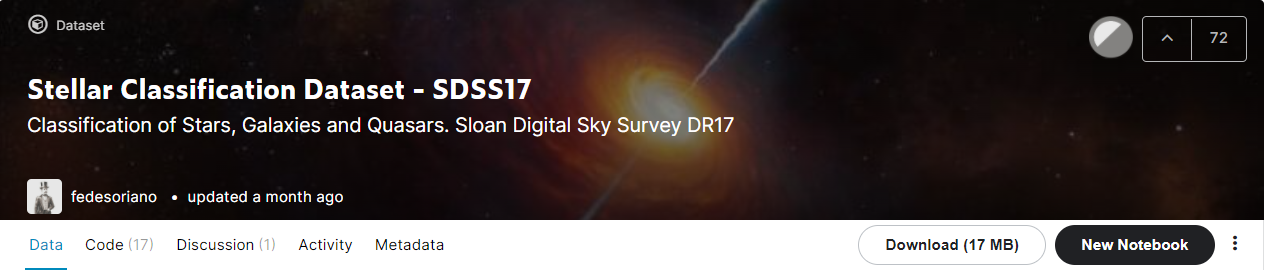

## III. Citation & Acknowledgements

<b>Citations</b>
- fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

<b>Acknowledgements</b>

The data released by the SDSS is under public domain. Its taken from the current data release RD17.

- More information about the license: http://www.sdss.org/science/image-gallery/

SDSS Publications:

- Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026]

## IV. What is Supervised Classification Algorithm?

Classification <b>is the process of recognizing, understanding, and grouping ideas and objects into preset categories or “sub-populations.” Using pre-categorized training datasets, machine learning programs use a variety of algorithms to classify future datasets into categories.</b>

Classification algorithms in machine learning use input training data to predict the likelihood that subsequent data will fall into one of the predetermined categories. One of the most common uses of classification is filtering emails into “spam” or “non-spam.” 

In short, classification is a form of “pattern recognition,” with classification algorithms applied to the training data to find the same pattern (similar words or sentiments, number sequences, etc.) in future sets of data.

Using classification algorithms, which we’ll go into more detail about below, text analysis software can perform tasks like aspect-based sentiment analysis to categorize unstructured text by topic and polarity of opinion (positive, negative, neutral, and beyond). (source = https://monkeylearn.com/blog/classification-algorithms/)

<p align="center">
<img src = "https://paulvanderlaken.files.wordpress.com/2020/01/gam.gif?w=364">
</p>

## V. Plan of Attack

In this project, there are <b>6 Steps</b> in order to get the result using Classification Algorithms, Which are :

- Load & Clean the Dataset
- Exploration of the Dataset
- Train the Dataset with Classification Algorithms & Evaluate Using Some Metrics
- Tuning the model that works most effectively for the dataset

Let's get it.

### Step 1 : Load & Clean the Dataset

#### Part 1 : Import Libraries

The very first step of this project is <b>Import your libraries</b>, I Imported 4 libraries first in the beginning, which are :
- <b>Pandas</b> : for data manipulation and analysis
- <b>Numpy</b> : for working with arrays
- <b>Matplotlib</b> : for visualizations
- <b>Seaborn</b> : for visualizations

related documentations :

- https://pandas.pydata.org/
- https://numpy.org/
- https://matplotlib.org/
-  https://seaborn.pydata.org/

In [1]:
import numpy as np #pro tip : use alias to make your code easier.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Part 2 : Load The Dataset

After you successfully import your libraries, the next step is <b>Load your Dataset</b> . When I downloaded the dataset, the type of the file is <b>CSV</b> . use <b>pd.read_csv</b> and then show it with <b>head()</b> function.

In [2]:
df = pd.read_csv('datasets/star_classification.csv')
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


as you can see, there's a lot of columsn and the real data is about <b>100000 rows</b>. <b>Our goal is to classify all these columns with the class column</b>, which are <b>GALAXY, QSO, and STAR</b>.

#### Part 3 : Data Cleaning

After you see the glimpse of the dataset, the next step is <b>Clean your Dataset</b> . In this step, <b>I arranged some columns and changed some values into numerical</b> so when we want to do the EDA and Training with the Machine Learning Algorithm, the process will be easier. 

the first one is <b>arrange the columns</b>. I moved the <b>class column </b> to the right so when we will split the dataset, the extraction will be smoother. Use this syntax to do that.

In [3]:
df = df[['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID',
         'redshift', 'plate', 'MJD', 'fiber_ID', 'class']]
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1.424659,5026,55855,741,QSO
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,0.586455,11069,58456,113,QSO
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0.477009,6183,56210,15,GALAXY
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0.660012,6625,56386,719,GALAXY
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,-0.000008,2444,54082,232,STAR


Now the data is fully arranged!

The next one is check the <b>unique values</b> of <b>class columns</b>

In [4]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

as you can see, there are <b>3 Values</b> which are <b>GALAXY, QSO, and STAR</b>. QSO means <b>QUASAR</b>. as we know that majority of Machine Learning Models are slighly weak when train some categorical data, so we should change the class column into <b>Numerical Values</b>. and since the <b>obj_id</b> is unique values, we dont need that because its not necessary for our analysis

In [5]:
del df['obj_ID']

yes_no_columns = ['class']
for col in yes_no_columns:
    df[col].replace({'GALAXY': 1,'QSO': 2, 'STAR' : 3},inplace=True)

In [6]:
df.head(10)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1.424659,5026,55855,741,2
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,0.586455,11069,58456,113,2
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0.477009,6183,56210,15,1
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0.660012,6625,56386,719,1
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,-0.000008,2444,54082,232,3


In [7]:
df.to_csv('df_ready.csv')

<b>SIUUU! the dataset is ready and we can do the Data Exploration & Train Them using ML Algorithms.</b>

### Step 2 : Exploration of the Dataset

#### Part 1 : The Big Picture

we want to know what is the stats of each column in this dataset. Use <b>describe()</b> to measure it.

In [8]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740,1.621490
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404,0.816778
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000,1.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000,1.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000,2.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,3.000000


from the function we can conclude that <b>each column that has the same type (ex :filter)</b> has small differences, like <b>mean, median, 1st percentile, 3rd percentile, etc</b> . Meanwhile <b>there's no missing value</b> since all columns counted in <b>100000</b> values

#### Part 2 : Visualizations

this is the part that I love the most in this step. Visualizations!. In this step, we use <b>Seaborn</b> as our main library for visualization. from my scanning of the dataset, <b>I want to measure 2 metrics</b>, which are : 
- <b>Correlation between Alpha angle and Delta angle with the the classification of the class</b>
- <b>Correlation betwen Redshift Values with the classification of the class</b>

related documentations :
- https://seaborn.pydata.org/

<p align="center">
<img src = "https://i.stack.imgur.com/uzyHd.gif">
</p>

#### Part 3 : Viz part 1

The first one is I want to make a Viz from <b>Correlation between Alpha angle and Delta angle with the the classification of the class</b> using <b>Histogram</b>. I want to know the <b>distribution of alpha and delta for each class</b>

related documentation :
- https://seaborn.pydata.org/generated/seaborn.histplot.html

The first one is I want to subset the datasets in just 2 columns and 2 tables, <b>alpha and class</b> and then <b>delta and class</b>. Use <b>Pandas</b> to do this. and the plot use <b>sns.histplot()</b>

In [9]:
df_alpha = df[['alpha', 'class']]
df_alpha.head()

,alpha,class
0,135.689107,1
1,144.826101,1
2,142.188790,1
3,338.741038,1
4,345.282593,1


<AxesSubplot:xlabel='alpha', ylabel='Count'>

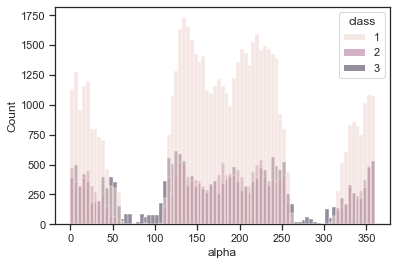

In [10]:
sns.set_theme(style="ticks", palette="pastel")

sns.histplot(df_alpha, x="alpha", hue = 'class')

In [11]:
df_delta = df[['delta', 'class']]
df_delta.head()

,delta,class
0,32.494632,1
1,31.274185,1
2,35.582444,1
3,-0.402828,1
4,21.183866,1


<AxesSubplot:xlabel='delta', ylabel='Count'>

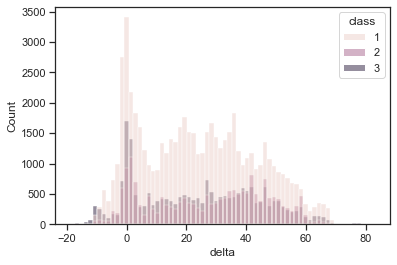

In [12]:
sns.set_theme(style="ticks", palette="pastel")

sns.histplot(df_delta, x="delta", hue = 'class')

#### Part 4 : Viz part 2

The second one is I want to make a Viz from <b>Correlation betwen redshift value with the classification of the class</b> using <b>histogram</b>. I want to know the <b>distribution of redshift value column that has effect for the classification</b>

related documentation :
- https://seaborn.pydata.org/generated/seaborn.histplot.html

The first one is I want to subset the datasets in just 2 columns, <b>redshift, and class</b>. use <b>Pandas</b> to do this

In [13]:
df_filters = df[['redshift', 'class']]
df_filters.head()

,redshift,class
0,0.634794,1
1,0.779136,1
2,0.644195,1
3,0.932346,1
4,0.116123,1


after we subset, we make the <b>Histograms</b>. first we make for the <b>Galaxy class</b>

<AxesSubplot:ylabel='Count'>

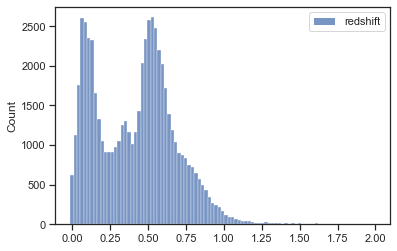

In [14]:
sns.set_theme(style="ticks")

sns.histplot(df_filters.loc[(df_filters['class'] == 1),['redshift']])

and then for the <b>Quasar Class</b>

<AxesSubplot:ylabel='Count'>

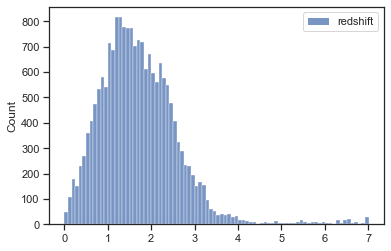

In [15]:
sns.set_theme(style="ticks")

sns.histplot(df_filters.loc[(df_filters['class'] == 2),['redshift']])

and the last one is for the <b>star class</b>

<AxesSubplot:ylabel='Count'>

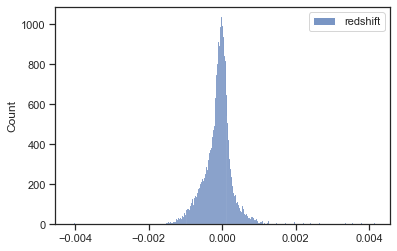

In [16]:
sns.set_theme(style="ticks")

sns.histplot(df_filters.loc[(df_filters['class'] == 3),['redshift']])

#### Part 5 : Conclusion

<b>From the Visualizations above</b>, I Found insights, which are :

1. <b>there are 2 gaps for class 1 and 2 in the alpha and class histogram</b> which are in <b>50 - 100</b> and <b>250 - 300</b>. for <b>class 3</b>, it its the class that has the <b>smallest values</b> compare to the other classes. You can see it in the histogram between alpha & class and histogram between delta & class. meanwhile, <b>Class 1 (Galaxy) has the highest values compare to the other 2</b>.
2. we can got the redshift value from the increase in wavelength. which means <b>the bigger the wavelength, the bigger the redshift value</b>. <b>Class 3 has the smallest threshold</b> between the other 2. <b>Class 2 has the biggest threshold (0-7)</b> in redshift value, the histogram of <b>class 2 has a positive skewness</b>. Meanwhile the <b>class 1's threshold its in the middle in the redshift value</b>. <b>its about 0 - 1.25</b>

### Step 3 : Train the Dataset with Classification Algorithms & Evaluate Using Some Metrics


This is the main step of this project. we will train the Stellar Dataset with Supervised Learning Algorithms. In This project, the algorithms are :

- <b>Logistic Regression</b>
- <b>KNN</b>
- <b>SVM</b>
- <b>Naive Bayes</b>
- <b>Decision Tree</b>
- <b>Random Forest</b>

I use <b>Scikit-learn</b> to train the dataset. Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.

Related documentation :
- https://scikit-learn.org/stable/

#### Part 1 : Logistic Regression

<b>Logistic regression</b> is the <b>appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis</b>.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. (source = https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/)

related documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<p align="center">
<img src = "https://miro.medium.com/max/1280/1*blOad1e0c5V8EsTx03chWg.gif">
</p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [17]:
df_logistic = pd.read_csv('df_ready.csv')

In [18]:
X = df_logistic.iloc[:, :-1].values
y = df_logistic.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b>LogisticRegression</b>. and put 0 in the <b>random_state</b> argument. 

In [21]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

predict the training data, save the result in <b>y_pred</b>

In [22]:
y_pred = log.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

related document :
- https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14301,   228,   276],
       [  549,  4189,     5],
       [    1,     4,  5447]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.95748

after we trained the data using <b>Logistic Regression</b>, we got accuracy in <b>95%</b>

#### Part 2 : KNN

<b>KNN</b> stands for <b>k-Nearest Neighbours</b>. It is a supervised learning algorithm. This means that we train it under supervision. KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). (source = https://towardsdatascience.com/laymans-introduction-to-knn-c793ed392bc2)

related documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

<p align="center">
<img src = "https://miro.medium.com/max/864/1*5guRJwB0a7MmMOCNFznGJQ.gif"></p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [25]:
df_knn = pd.read_csv('df_ready.csv')

In [26]:
X = df_knn.iloc[:, :-1].values
y = df_knn.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b>KNeighborsClassifier</b>. and put 5 in the <b>n_neighbors</b> argument. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

predict the training data, save the result in <b>y_pred</b>

In [30]:
y_pred = knn.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14293,   165,   347],
       [  486,  4169,    88],
       [ 1142,    39,  4271]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.90932

after we trained the data using <b>KNN</b>, we got accuracy in <b>90%</b>. for now, <b>Logistic Regression</b> is still better than <b>KNN</b> in performance.

#### Part 3 : SVM

<b>Support Vector Machine</b> (SVM) is a <b>supervised machine learning algorithm that can be used for both classification or regression challenges</b>. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. (source = https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

related documentation :
- https://scikit-learn.org/stable/modules/svm.html

<p align="center">
<img src = "https://machinelearningjourney.com/wp-content/uploads/2020/01/Linear3D.gif"></p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [33]:
df_svm = pd.read_csv('df_ready.csv')

In [34]:
X = df_svm.iloc[:, :-1].values
y = df_svm.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b> from sklearn.svm import SVC</b>. and put <b>rbf</b> in the <b>kernel</b> argument since we have non-linear data 

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

predict the training data, save the result in <b>y_pred</b>

In [38]:
y_pred = svm.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14372,   155,   278],
       [  412,  4315,    16],
       [   99,     0,  5353]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9616

after we trained the data using <b>SVM</b>, we got accuracy in <b>96%</b> Which means that this model is more effective than <b>Logistic Regression </b>

#### Part 4 : Naive Bayes

<b>Naive Bayes</b> is a <b>classification technique based on Bayes’ Theorem with an assumption of independence among predictors</b>. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. (source = https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)

related document : 
- https://scikit-learn.org/stable/modules/naive_bayes.html

<p align="center">
<img src = "https://miro.medium.com/max/1280/1*blOad1e0c5V8EsTx03chWg.gif">
</p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [41]:
df_nb = pd.read_csv('df_ready.csv')

In [42]:
X = df_nb.iloc[:, :-1].values
y = df_nb.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b> from sklearn.naive_bayes import GaussianNB</b>. and then fit the <b>X_train and y_train</b>

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

predict the training data, save the result in <b>y_pred</b>

In [46]:
y_pred = nb.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[12586,  2103,   116],
       [  576,  4166,     1],
       [   31,    92,  5329]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.88324

after using <b>Naive Bayes</b>, we got the accuracy in <b>88%</b> which is not really effective compares to <b>SVM</b>.

#### Part 5 : Decision Tree

<b>Decision Trees</b> are a type of Supervised Machine Learning <b>where the data is continuously split according to a certain parameter</b>. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split. (source = https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html)

related documentation :
- https://scikit-learn.org/stable/modules/tree.html#classification

<p align="center">
<img src = "https://miro.medium.com/proxy/1*9kACduxnce_JdTrftM_bsA.gif"></p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [49]:
df_tree = pd.read_csv('df_ready.csv')

In [50]:
X = df_tree.iloc[:, :-1].values
y = df_tree.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b> from sklearn.tree import DecisionTreeClassifier
</b>. Put <b>entropy</b> as criterion. and then fit the data.

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

predict the training data, save the result in <b>y_pred</b>

In [54]:
y_pred = nb.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[12586,  2103,   116],
       [  576,  4166,     1],
       [   31,    92,  5329]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.88324

after using <b>Decision Tree</b>, we got the accuracy in <b>88%</b> which is not really effective compares to <b>SVM</b>.

#### Part 6 : Random Forest

<b>Random forest</b> is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. <b>It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.</b>

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problem. (source = https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

related documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<p align="center">
<img src = "http://talimi.se/wp-content/uploads/2017/11/rf.gif"></p>

The first one is make <b>df_ready</b>(the dataframe from previous step that already downloaded into my directory) into 2 parts, <b>X and y</b> . X is for the features and y is for the target.

In [57]:
df_forest = pd.read_csv('df_ready.csv')

In [58]:
X = df_forest.iloc[:, :-1].values
y = df_forest.iloc[:, -1].values

after that, <b>we split the datasets into 4 parts</b>, X_train, y_train, X_test, y_test. Because we want to compare all classification algorithms, we use the same arguments. In this case, I use <b>test_size in 0.25 and random_state in 0</b>. 

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

before we train the data, we need to standardize the value in our datasets using <b>StandardScaler</b>

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and then, Train the data. From the sklearn, import <b> from sklearn.ensemble import RandomForestClassifier
</b>. Put <b>entropy</b> as criterion and <b>estimators</b> in 10. and then fit the data.

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

predict the training data, save the result in <b>y_pred</b>

In [62]:
y_pred = rf.predict(X_test)

after that, we evaluate the model using <b>confusion matrix</b> and <b>accuracy score</b>.

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[14577,   168,    60],
       [  372,  4370,     1],
       [   13,     0,  5439]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.97544

after we trained the data using <b>Random Forest</b> we got the accuracy in <b>97%</b> which is this is the best model for this dataset. after we trained, we will <b>tuning the model in the next step</b>

### Step 4 : Tuning the model that works most effectively for the dataset

after we found the best model for the stellar dataset, <b>we will tune the dataset in order to get the top notch accuracy than before.</b>. we will use <b>Grid search</b> for find the optimal hyperparameters of a model which results in the most 'accurate' predictions and <b>K-cross validation</b> for assessing how the results of a statistical analysis will generalize to an independent data set. 

related documentations :
- <b>grid search</b> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- <b>K-cross validation</b> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

first we <b>apply cross validation</b> to the <b>random forest model</b> to estimate the skill of a machine learning model on unseen data

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.54 %
Standard Deviation: 0.19 %


We got <b>97.54%</b> for accuracy and <b>0.19%</b> for standard deviation which is quite good.

after that we <b>apply grid search</b> to the same model to get the best parameters

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'criterion': ['gini']},
              {'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'criterion': ['entropy'], }]
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.74 %
Best Parameters: {'criterion': 'gini', 'n_estimators': 20}


We got the <b>Best Accuracy Recommendation from Grid search when we apply n_estimators in 20 and criterion in gini</b>

## Conclusion

From The Analysis and Training, We got insights, which are :
1. <b>all aspects in the dataset is matters</b>. starting from angle, filters, even redshift and camera angle. all matters to classify into 3 class, which are <b>Galaxy, Quasar, and Star</b>
2. <b>Random Forest is the best model to classify Stellar</b>. You can optimize it with change the parameters in <b>20</b> as the n_estimators and <b>gini</b> as the criterion.

That's all for my ML project this time. sorry if you find errors when you reading it because the author is still in the learning stage. See you in the next project!